In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [2]:
# dataset 
df = pd.read_csv("dataset_balanced_AI.csv")
# QODE verification dataset 
df_veri = pd.read_csv("dataset_balanced_runtime_QODE 2.csv")

df

,Rating,Cost(per hour USD),Instance
0,3.666667,0.0928,t2.large
1,2.000000,0.0832,B2ms
2,3.333333,0.0950,N1s2
3,3.333333,0.0150,Lin.G
4,2.666667,0.1000,c4.large
...,...,...,...
75,3.000000,0.0230,t2.small
76,4.000000,0.0752,t3a.large
77,4.000000,0.0376,t3a.medium
78,4.000000,0.0188,t3a.small


In [3]:
from sklearn.utils import shuffle
df = shuffle(df)

df=df.append(df_veri)

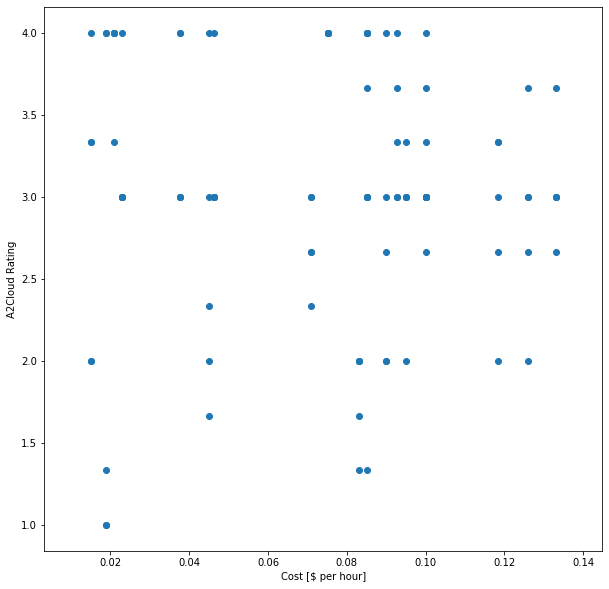

In [4]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df.iloc[:,1:2],df.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')
plt.show()

In [5]:
X=df.iloc[:,0:2]
model = KMeans(n_clusters = 4)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([2, 0, 2, 2, 0, 0, 3, 0, 0, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 3, 0, 3, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 3, 0, 3, 3, 0, 0, 0,
       3, 0, 2, 0, 3, 0, 0, 2, 2, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 1, 3, 2, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [6]:
df['cluster']=labels
df11=df.iloc[0:80,:]
df11

,Rating,Cost(per hour USD),Instance,cluster
24,3.666667,0.1000,c4.large,2
22,3.000000,0.0950,N1s2,0
52,4.000000,0.0850,c5.large,2
72,3.666667,0.0850,c5.large,2
40,3.000000,0.0928,t2.large,0
...,...,...,...,...
1,2.000000,0.0832,B2ms,3
67,4.000000,0.0450,Lin.C,2
77,4.000000,0.0376,t3a.medium,2
31,2.000000,0.0900,Lin.M,3


In [7]:
df1=df.iloc[0:80,:]
df1
lab1=df1['cluster'].values.tolist()


Text(0, 0.5, 'A2Cloud Score')

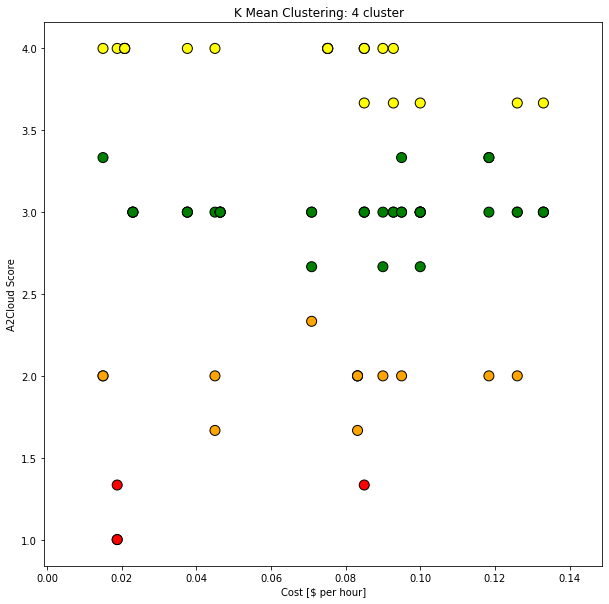

In [8]:

fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow','orange'])
plt.scatter(df1.iloc[:,1:2], df1.iloc[:,0:1], c=colormap[lab1], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 4 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')

In [9]:
df_veri

,Rating,Cost(per hour USD),Instance
0,3.333333,0.0928,t2.large
1,1.333333,0.0832,B2ms
2,3.000000,0.0950,N1s2
3,3.333333,0.0150,Lin.G
4,3.333333,0.1000,c4.large
5,3.000000,0.0850,F2s
6,2.666667,0.0709,N1cc
7,2.333333,0.0450,Lin.C
8,2.666667,0.1330,r4.large
9,2.666667,0.1260,E2s


In [10]:
df

,Rating,Cost(per hour USD),Instance,cluster
24,3.666667,0.1000,c4.large,2
22,3.000000,0.0950,N1s2,0
52,4.000000,0.0850,c5.large,2
72,3.666667,0.0850,c5.large,2
40,3.000000,0.0928,t2.large,0
...,...,...,...,...
15,4.000000,0.0230,t2.small,2
16,4.000000,0.0752,t3a.large,2
17,4.000000,0.0376,t3a.medium,2
18,4.000000,0.0188,t3a.small,2


In [11]:
xtrain=df[['Rating','Cost(per hour USD)']]
xtrain=xtrain[0:64]
ytrain=df['cluster'].values.tolist()
ytrain=ytrain[0:64]

In [12]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
xtest=df[['Rating','Cost(per hour USD)']]
xtest=xtest[64:80]
b=df['cluster'].values.tolist()

y_actual=b[64:80]

In [14]:
y_pred = classifier.predict(xtest)


In [15]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 87.5 %


In [16]:
print(confusion_matrix(y_pred, y_actual))


[[6 0 0 0]
 [0 0 0 0]
 [0 0 6 0]
 [0 2 0 2]]


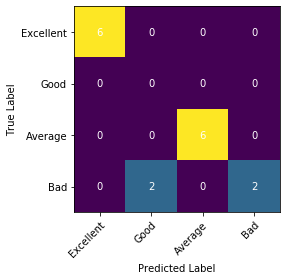

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

a_label = ["Excellent", "Good","Average", "Bad"]
p_label = ["Excellent","Good", "Average", "Bad"]

#harvest = np.array([[4,0,0],[0,0,0], [0,7,1]])
cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

# QODE VERIFICATION

In [ ]:
x_qode=df_veri[['Rating','Cost(per hour USD)']]

y_pred = classifier.predict(x_qode)


In [ ]:
y_actual=b[80:100]

y_actual

In [ ]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

a_label = ["Excellent", "Good","Average", "Bad"]
p_label = ["Excellent","Good", "Average", "Bad"]

#harvest = np.array([[4,0,0],[0,0,0], [0,7,1]])
cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
n_classes = 3
clf=OneVsRestClassifier (GaussianNB())
clf.fit(xtrain, ytrain)

In [ ]:
y_score = clf.predict(xtest)
y_actual=np.array(y_actual)
y_score = y_score.argmax(axis=-1)



In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_actual[i], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
for i in range(n_classes):
    y_actual[0, 0]

In [ ]:
y_actual[3]

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle

#iris = datasets.load_iris()
#x = iris.data[:, 2:]
x=xtrain
y = ytrain
x_test = xtest
y_test = np.array(y_actual)
n_classes=4
'''NAIVE BAYES'''

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x,y)
nb=model.score(x,y)

pred1=model.predict(x_test)
t1=sum(x==0 for x in pred1-y_test)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    print(fpr[i], tpr[i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes - IRIS DATASET')
plt.legend(loc="lower right")
plt.show()

[0. 0. 1.] [0. 1. 1.]
[0.         0.42857143 1.        ] [0. 0. 1.]
[0.  0.4 1. ] [0. 0. 1.]


IndexError: index 3 is out of bounds for axis 1 with size 3

In [25]:
y_test

(16,)

In [ ]:
pred1

In [28]:
y_test

array([0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 3, 2, 2, 3, 0])

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle

#iris = datasets.load_iris()
#x = iris.data[:, 2:]
x=xtrain
y = ytrain
x_test = xtest
y_test = np.array(y_actual)
n_classes=16
'''NAIVE BAYES'''

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x,y)
nb=model.score(x,y)

pred1=model.predict(x_test)
t1=sum(x==0 for x in pred1-y_test)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    print( roc_curve(y_test[i]+1, pred1[i]+1 ))






TypeError: Singleton array 1 cannot be considered a valid collection.

In [ ]:

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes - IRIS DATASET')
plt.legend(loc="lower right")
plt.show()